In [1]:
import pandas as pd
import numpy as np
import re


In [72]:
pip install wordcloud

In [5]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [6]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy

In [8]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv('/content/drive/MyDrive/final project/MarketApp/NLP/preprocessed_amazon.csv')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
df

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [15]:
df['Product Description']

0        PROFESSIONAL GRADE Face Peel: this peel stimul...
1        Use: eye, item type: cream, net wt: 20g, gzzz:...
2        Prevent the tongue from dropping backward or b...
3        Harvey's wafer Cream Wafer 110g. Made in Country3
4        Package Quantity:3 Contains borage oil, clinic...
                               ...                        
23061    Size:Pack of 4 Dove Men + Care Antiperspirant ...
23062    Use before showering to help soften the scales...
23063    For a smooth & Flawless complexion this scrub ...
23064    Gold eye mask is suitable for people: Eye patt...
23065    With 2.5% active Retinol, Hyaluronic Acid, Vit...
Name: Product Description, Length: 23066, dtype: object

In [16]:
#check null values
df['Product Title'].isnull().sum()
df['Product Description'].isnull().sum()
df['Price'].isnull().sum()
df['Category'].isnull().sum()


0

In [18]:
# checking distribution of the "Category" column
df_1 = df.copy()
df_1['Category'] = df_1['Category'].str.split(' | ').str[0]
df_1
print(df_1['Category'].value_counts())

Category
Skin          11394
Grocery        6311
Hair           1846
Fragrance      1716
Bath           1654
Detergents      145
Name: count, dtype: int64


In [19]:
#checking distribution of products
product_counts = df_1['Product Title'].value_counts()

print(product_counts)

Product Title
 Xplus Bath Loofah(Pack of 3)                                                                                                                                                       39
 Bogatchi Chocolate Gift Box, Happy Diwali Chocolate, Diwali Chocolate Gifts, Diwali Chocolate Gift, Diwali Chocolate Bar, Diwali Gifts, 15 Pieces                                  16
 Xplus Bath Loofah                                                                                                                                                                  11
 Bogatchi Chocolate Gift Box, 15 Pieces                                                                                                                                              5
 CANDYCORNER "Happy Rakshabandhan " ( 9 CHOCOLATE BOX ) - with Love You Bhai | rakshabandhan gift for brother | rakhi gift for sister | gift for rakshabandhan | gift for rakhi      5
                                                                       

In [20]:
df_1

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


<Axes: xlabel='Category'>

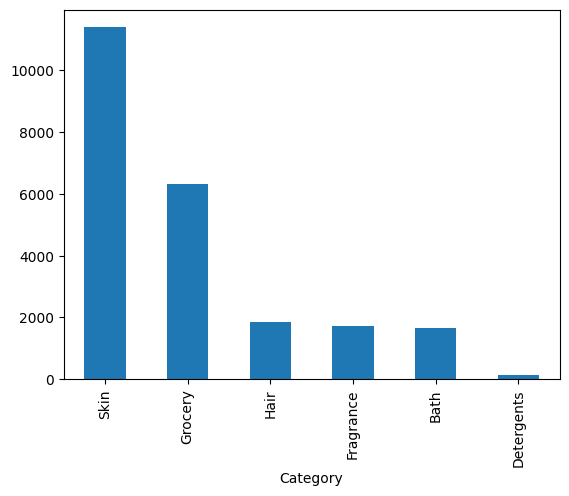

In [21]:
# Replace commas in the 'Category' column
# df['Category'] = df['Category'].str.replace(',', '')
# make bar plot of the categories
df_1['Category'].value_counts().plot(kind='bar')

                                           Product Title  Name Length
0       Lee posh Lactic Acid 60% Anti ageing Pigmenta...           70
1       Generic 1 Pc brand snail eye cream remove dar...          136
2       Generic Anti Snoring Snore Stopper Sleep Apne...           89
3       Harveys Crunchy & Creame Gourmet Delicacies C...          116
4       Shikai Borage Dry Skin Therapy Foot Cream, 4....           72
...                                                  ...          ...
23061   Dove Men + Care Cool Silver Antiperspirant De...           73
23062             Dermasolve Psoriasis Body Wash 8.0 Oz            39
23063   Pure Organics Skin Lightening Mild Face Scrub...           53
23064   Yashus Moisturizing Anti-aging Gold Collagen ...           67
23065   Slss Anti Wrinkle Organic Hyaluronic Acid Vit...           94

[23066 rows x 2 columns]
count    23066.000000
mean        80.092257
std         37.019718
min          6.000000
25%         52.000000
50%         73.000000
75

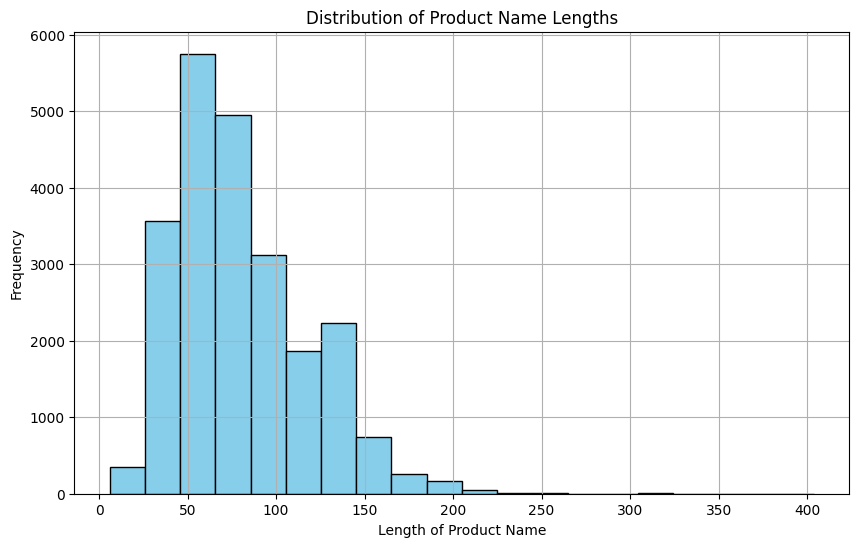

In [22]:
df_1['Name Length'] = df_1['Product Title'].apply(len)
print(df_1[['Product Title', 'Name Length']])

description = df_1['Name Length'].describe()
print(description)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_1['Name Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Name Lengths')
plt.xlabel('Length of Product Name')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
df

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [47]:
df_2=df.copy()

In [48]:
df_2

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [49]:
df_2['Text'] = df_2['Category'] + " | " + df_2['Product Title'] + " | " + df_2['Product Description'] + " | " + df_2['Price'].astype(str) + " | " + df_2['Conditions']


In [50]:
df_2

,Category,Product Title,Product Description,Price,Conditions,Description Length,Text
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325,Skin Care | Lee Posh | Lee posh Lactic Acid 6...
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510,Skin Care | Generic | Generic 1 Pc brand snai...
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438,Skin Care | Generic | Generic Anti Snoring Sn...
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49,Grocery & Gourmet Foods | Harveys | Harveys C...
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187,Skin Care | ShiKai | Shikai Borage Dry Skin T...
...,...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90,Fragrance | Dove | Dove Men + Care Cool Silve...
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586,Bath & Shower | Dermasolve | Dermasolve Psori...
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379,Skin Care | Pure Organics | Pure Organics Ski...
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417,Skin Care | YASHUS | Yashus Moisturizing Anti...


In [51]:
df_2['Index']=df_2.index

In [52]:
random_seed = 42
sample = df_2.sample(n=1000, random_state=random_seed)
sample

sample = sample[['Index', 'Text']]
sample

,Index,Text
11117,11117,Grocery & Gourmet Foods | CHOCOCRAFT | Gift i...
4572,4572,Skin Care | ATOMY | Atomy Cream Sun Pa Sunscr...
1412,1412,"Fragrance | Linn Young | EDP 100ml.""Oui Je TA..."
167,167,Grocery & Gourmet Foods | CHOCOCRAFT | Karvac...
11253,11253,Grocery & Gourmet Foods | CHOCOCRAFT | CHOCOC...
...,...,...
16757,16757,Grocery & Gourmet Foods | TeaRaja | Tearaja A...
20479,20479,Grocery & Gourmet Foods | BOGATCHI | Bogatchi...
18209,18209,Grocery & Gourmet Foods | VY VedaYug | VY Ved...
20143,20143,"Hair Care | BioSilk | Biosilk Silk Therapy, 2..."


In [53]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Update regex pattern to include hyphens explicitly
pattern = re.compile('[\W_\-]+|')  # Including hyphen explicitly

# Function to clean tokens
def clean_tokens(text):
    # Process the text
    doc = nlp(text)
    # Filter tokens using regex, check if alphabetic, and exclude stopwords
    cleaned_tokens = [
        pattern.sub('', token.lemma_).lower()
        for token in doc
        if pattern.sub('', token.lemma_).isalpha() and not token.is_stop
    ]
    return cleaned_tokens

# Apply function
sample['cleaned_tokens'] = sample['Text'].apply(clean_tokens)

# Display results
print(sample[['Text', 'cleaned_tokens']])

                                                    Text  \
11117  Grocery & Gourmet Foods | CHOCOCRAFT |  Gift i...   
4572   Skin Care | ATOMY |  Atomy Cream Sun Pa Sunscr...   
1412   Fragrance | Linn Young |  EDP 100ml."Oui Je TA...   
167    Grocery & Gourmet Foods | CHOCOCRAFT |  Karvac...   
11253  Grocery & Gourmet Foods | CHOCOCRAFT |  CHOCOC...   
...                                                  ...   
16757  Grocery & Gourmet Foods | TeaRaja |  Tearaja A...   
20479  Grocery & Gourmet Foods | BOGATCHI |  Bogatchi...   
18209  Grocery & Gourmet Foods | VY VedaYug |  VY Ved...   
20143  Hair Care | BioSilk |  Biosilk Silk Therapy, 2...   
2173   Bath & Shower | Mehron |  Mehron "MiniPro" Stu...   

                                          cleaned_tokens  
11117  [grocery, gourmet, foods, chococraft, gift, id...  
4572   [skin, care, atomy, atomy, cream, sun, pa, sun...  
1412   [fragrance, linn, young, edp, oui, je, taime, ...  
167    [grocery, gourmet, foods, chococraft

In [55]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


In [56]:
# Fit on our model
vectors = tfidf_vectorizer.fit_transform(sample['Text'])

In [57]:
# example output
vectors.shape

(1000, 6890)

In [58]:
# Create dataframe with terms and tfidf
tfidf_df = pd.DataFrame(vectors.toarray(),
                        index=sample.index.values,
                        columns=tfidf_vectorizer.get_feature_names_out()
                        )
# Explore some selected terms

tfidf_df


,00,000,001,0013,0033118,006607,0068,00802,01,015kg,...,различные,размер,розовый,советы,супер,тип,украшения,формы,цветов,яркий
11117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Let's create a heatmap of higest terms in some of the documents

tfidf_df = (tfidf_df
            .stack()
            .reset_index()
            .rename(columns={0: 'tfidf', 'level_0': 'Index', 'level_1': 'term'})
           )

In [60]:
# Group the documents by their n highest performing terms

n = 5
top_tfidf = (tfidf_df
             .sort_values(by=['Index','tfidf'], ascending=[True,False])
             .groupby(['Index'])
             .head(n)
            )
top_tfidf

,Index,term,tfidf
5587525,35,vogue,0.617902
5587702,35,ximi,0.617902
5582447,35,cleanser,0.300844
5581568,35,aloe,0.267743
5583436,35,facial,0.214977
...,...,...,...
5645724,23053,frontier,0.635627
5645777,23053,garlic,0.405851
5645915,23053,granules,0.405851
5648277,23053,roasted,0.219446


In [78]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

random_seed = 42
sample = df.sample(n=1000, random_state=random_seed)
sample = sample.reset_index(drop=True)
sample

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_name = sample['Product Title']
product_description= sample['Product Description']

product_texts = [f"{name} {description}" for name, description in zip(sample['Product Title'], sample['Product Description'])]
product_titles = list(df['Product Title'])

embeddings = model.encode(product_texts, show_progress_bar=True).astype('float32')




Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [79]:
embeddings.shape

(1000, 384)

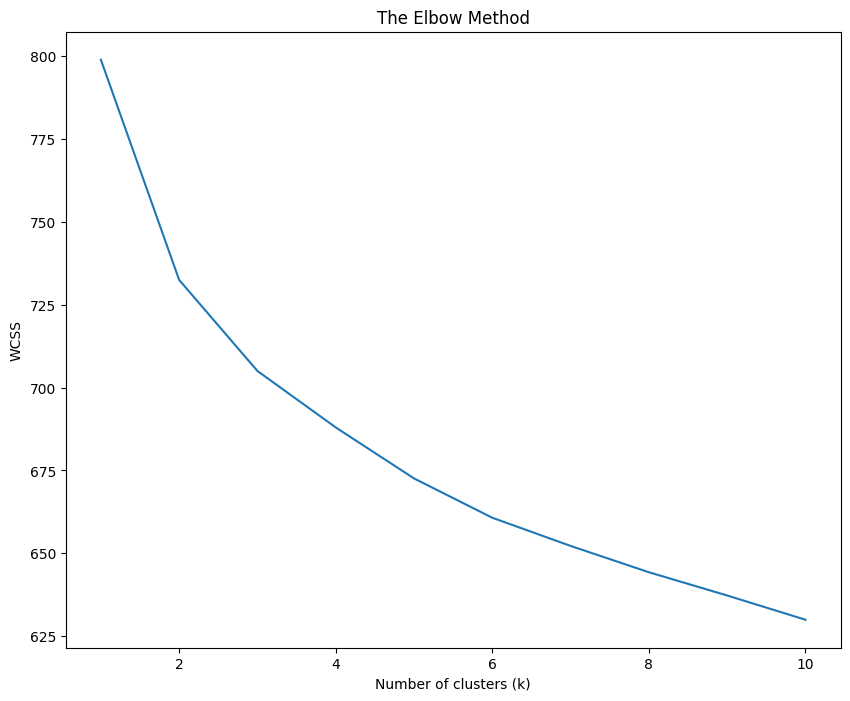

In [82]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):  # Test k from 1 to 10, you can adjust this range depending on your data
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=340)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')  # Within-cluster sums of squares
plt.show()

(1000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster distribution: {0: 431, 1: 142, 2: 427}


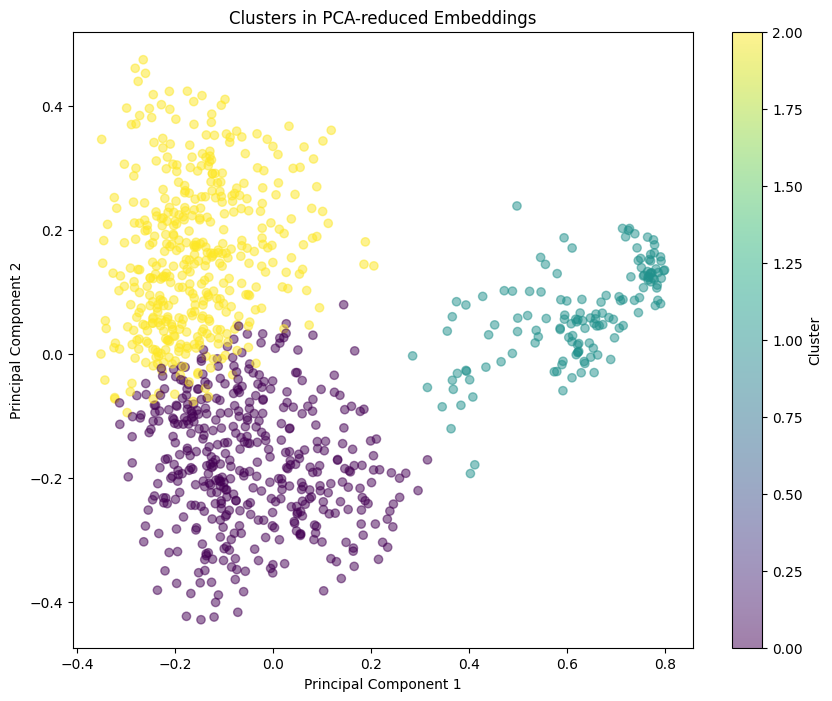

In [92]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pca = PCA(n_components=3)
compressed_embeddings = pca.fit_transform(embeddings)

print(compressed_embeddings.shape)



kmeans = KMeans(n_clusters=3, random_state=340)
clusters = kmeans.fit_predict(compressed_embeddings)

unique, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))


plt.figure(figsize=(10, 8))
plt.scatter(compressed_embeddings[:, 0], compressed_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters in PCA-reduced Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



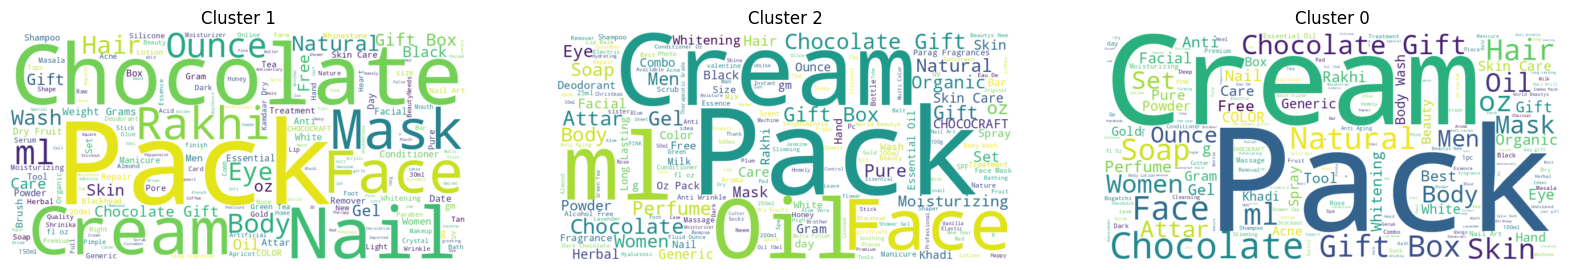

In [93]:
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cluster_texts = defaultdict(str)

for text, label in zip(df['Product Title'], clusters):
    cluster_texts[label] += " " + text

plt.figure(figsize=(20, 10))

for i, (label, text) in enumerate(cluster_texts.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(1, len(cluster_texts), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")

plt.show()

In [ ]:
!pip install faiss-cpu


In [37]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_names = df['Product Title'].values
embeddings = model.encode(product_names, show_progress_bar=True).astype('float32')
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)


Batches:   0%|          | 0/721 [00:00<?, ?it/s]

In [38]:
def recommend(query, index, product_names, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    query_embedding = query_embedding.reshape(1, -1)
    distances, indices = index.search(query_embedding, top_k + 1)
    print("Top recommendations:")
    for i, idx in enumerate(indices[0][0:]):
        print(f"{i + 1}: {product_names[idx]} (Score: {1 - distances[0][i]})")

while True:
    user_input = input("Enter a product name to search for recommendations (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    recommend(user_input, index, product_names, top_k=5)


Enter a product name to search for recommendations (or type 'exit' to quit): exit


In [39]:
random_seed = 42
sample = df.sample(n=1000, random_state=random_seed)
sample = sample.reset_index(drop=True)
sample

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Grocery & Gourmet Foods | CHOCOCRAFT,Gift ideas for new year - 6 Chocolate Gift Bo...,This Chocolate Gift Box contains delectable as...,8.33,New,534
1,Skin Care | ATOMY,Atomy Cream Sun Pa Sunscreen Spf50 Uv Beige W...,these is very soft sunscreen,45.57,Good,28
2,Fragrance | Linn Young,"EDP 100ml.""Oui Je TAime""","Family -Cyprus - Fruity, Top note-Freesia, Bla...",22.39,Bad,124
3,Grocery & Gourmet Foods | CHOCOCRAFT,Karvachauth gifts online - 12 Chocolate Gift ...,This Chocolate Gift Box contains delectable as...,11.13,Bad,536
4,Grocery & Gourmet Foods | CHOCOCRAFT,"CHOCOCRAFT, womens day gift for corporate, 18...",This Chocolate Gift Box contains delectable as...,13.93,Very bad,536
...,...,...,...,...,...,...
995,Grocery & Gourmet Foods | TeaRaja,Tearaja Aqua Gift Box | 6 Glass Jars with Her...,Aqua Gift Set is great as a gift which include...,7.69,Bad,283
996,Grocery & Gourmet Foods | BOGATCHI,"Bogatchi Krazy Kiwi, 18% Bittersweet Dark Cho...",With bogatchi treat your self with goodness of...,5.59,Good,211
997,Grocery & Gourmet Foods | VY VedaYug,VY VedaYug Parsley Dried Leaves/Tea/Seasoning...,This is well used in garnishing your food prep...,3.43,Bad,88
998,Hair Care | BioSilk,"Biosilk Silk Therapy, 2.80 Pound","Biosilk Silk Therapy, 2.80 Pound",127.25,New,32


In [87]:

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_name = sample['Product Title']
product_description= sample['Product Description']

In [90]:
import faiss
import numpy as np

product_texts = [f"{name} {description}" for name, description in zip(sample['Product Title'], sample['Product Description'])]
product_titles = list(df['Product Title'])
embeddings = model.encode(product_texts, show_progress_bar=True).astype('float32')


normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

dimension = normalized_embeddings.shape[1]
index = faiss.IndexFlatIP(dimension)
index.add(normalized_embeddings)


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

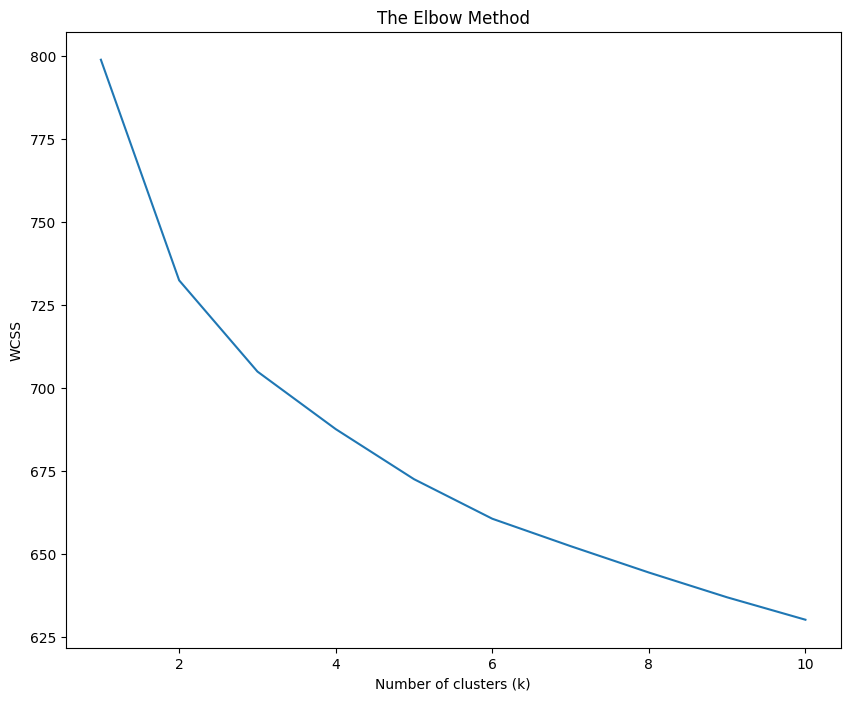

In [95]:
normalized_embeddings

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):  # Test k from 1 to 10, you can adjust this range depending on your data
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=340)
    kmeans.fit(normalized_embeddings)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')  # Within-cluster sums of squares
plt.show()

(1000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster distribution: {0: 431, 1: 142, 2: 427}


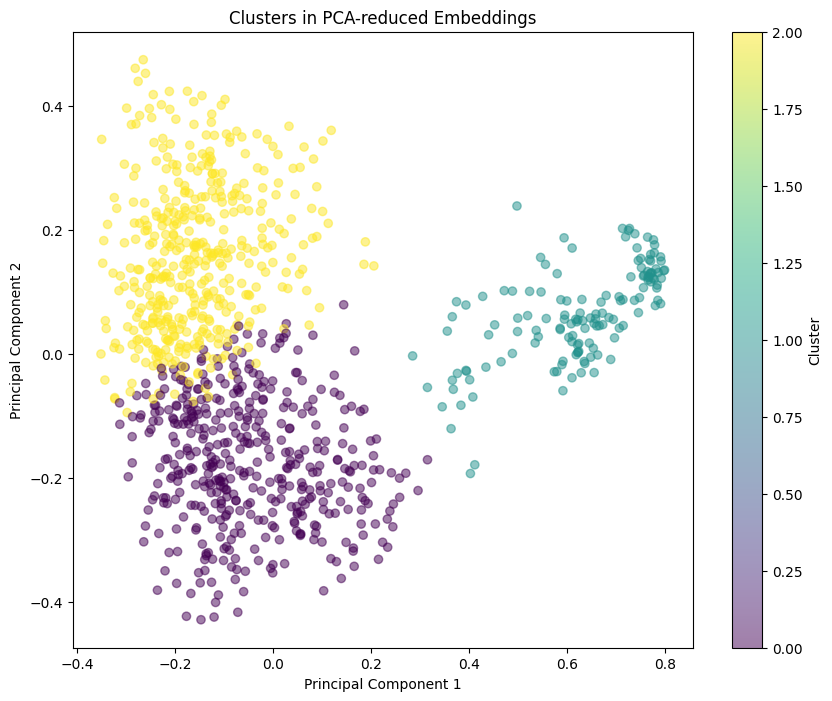

In [96]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pca = PCA(n_components=3)
compressed_embeddings = pca.fit_transform(normalized_embeddings)

print(compressed_embeddings.shape)



kmeans = KMeans(n_clusters=3, random_state=340)
clusters = kmeans.fit_predict(compressed_embeddings)

unique, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))


plt.figure(figsize=(10, 8))
plt.scatter(compressed_embeddings[:, 0], compressed_embeddings[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('Clusters in PCA-reduced Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


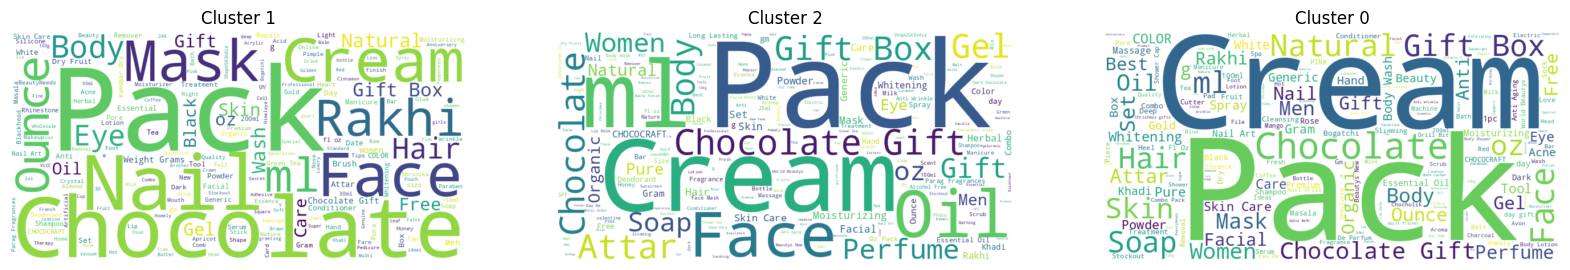

In [97]:
 from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cluster_texts = defaultdict(str)

for text, label in zip(df['Product Title'], clusters):
    cluster_texts[label] += " " + text

plt.figure(figsize=(20, 10))

for i, (label, text) in enumerate(cluster_texts.items(), 1):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(1, len(cluster_texts), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label}')
    plt.axis("off")

plt.show()

In [91]:
def recommend(query, model, index, product_titles, top_k=5):
    # Encode and normalize the query to have unit length
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    query_embedding = query_embedding / np.linalg.norm(query_embedding)

    # Perform the search
    distances, indices = index.search(query_embedding, top_k)

    print("Top recommendations based on cosine similarity:")
    for i, idx in enumerate(indices[0]):
        print(f"{i + 1}: {product_titles[idx]} (Similarity: {distances[0][i]:.4f})")

# Interact with the user to get product recommendations
while True:
    user_input = input("Enter a product query to get recommendations (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    recommend(user_input, model, index, product_titles)

Enter a product query to get recommendations (or type 'exit' to quit): pack
Top recommendations based on cosine similarity:
1:  PARAG FRAGRANCES NIGHT QUEEN Type 6ml Premium Quality Perfume Roll-on  (Similarity: 0.4464)
2:  R R AGRO FOODS Tea Cut Peppermint Leaves 100 Gms  (Similarity: 0.4398)
3:  Pdi Inc. Pyd41900 Castile Soap Towelettes, 100/Box,Pdi Inc. - Box 100  (Similarity: 0.4108)
4:  Chamong Tulsi Green Tea, Pack of 4, Per Pack 25 Teabags, 100% Natural Organic Tea  (Similarity: 0.3964)
5:  Licorice In 1 Kilo /2.2Lbs - Venco Coin Licorice - Muntendrop Liquorice  (Similarity: 0.3863)
Enter a product query to get recommendations (or type 'exit' to quit): disney
Top recommendations based on cosine similarity:
1:  Online Quality Store Mint Powder Peppermint for Face (500 Gms)  (Similarity: 0.2882)
2:  Gos Herbal Facial Powder 100gm (pack of 3)  (Similarity: 0.2633)
3:  Khadi Natural Assorted Soap Gift Set (Sandalwood, Pure Mint and Aloevera) pack of 3 (With free Hindi Tulsi Booklet)